<a href="https://colab.research.google.com/github/MDAWOODA/Classification-MobilePriceRangePrediction/blob/main/Copy_of_Mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries/modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Mobile price range prediction/data_mobile_price_range.csv')

**DATA SUMMARY**

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Now, we will use the info function to see the type of data in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# statistical values/ aggregate values of all rows
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**PRE-PROCESSING THE DATASET**

In [ ]:
#used to find the pairwise correlation of all columns in the dataframe
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [ ]:
df.shape

(2000, 21)

In [ ]:
df1 = df[df['sc_w']!=0]
df1.shape

(1820, 21)

Removing the rows with null entries.

**EXPLORATORY DATA ANALYSIS**

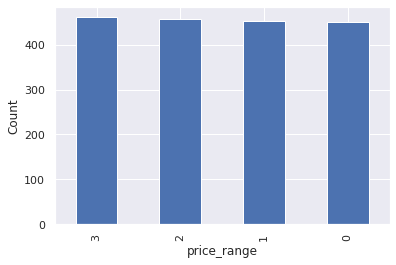

In [ ]:
#classes
sns.set()
price_plot=df1['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

There are mobile phones in 4 price ranges. The number of elements is almost similar.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1820 non-null   int64  
 1   blue           1820 non-null   int64  
 2   clock_speed    1820 non-null   float64
 3   dual_sim       1820 non-null   int64  
 4   fc             1820 non-null   int64  
 5   four_g         1820 non-null   int64  
 6   int_memory     1820 non-null   int64  
 7   m_dep          1820 non-null   float64
 8   mobile_wt      1820 non-null   int64  
 9   n_cores        1820 non-null   int64  
 10  pc             1820 non-null   int64  
 11  px_height      1820 non-null   int64  
 12  px_width       1820 non-null   int64  
 13  ram            1820 non-null   int64  
 14  sc_h           1820 non-null   int64  
 15  sc_w           1820 non-null   int64  
 16  talk_time      1820 non-null   int64  
 17  three_g        1820 non-null   int64  
 18  touch_sc

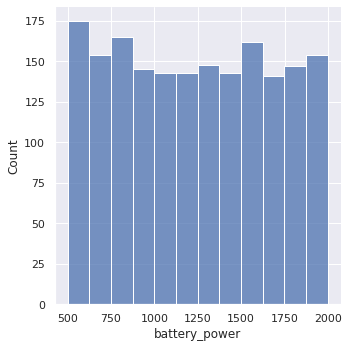

In [ ]:
# First, we see how the battery mAh is spread.
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df1["battery_power"])

plt.show()

Total energy a battery can store in one time measured in mAh is battery_power. 

*   Highest no. of mobile counts 175 is from the segment of lowest battery_power (500-625mAh) followed by range of (750-875mAh) around 165.
*  Then mobile count is similar throughout for different battery segment.  



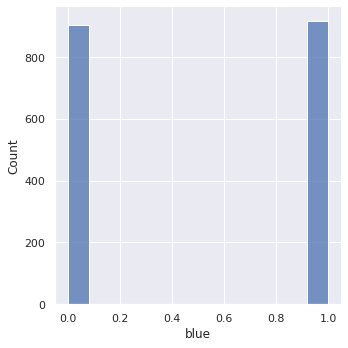

In [ ]:
# Now, we see the count of how many devices have Bluetooth and how many don’t.
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df1["blue"])

plt.show()

So, we can see that half the devices have Bluetooth, and half don’t.

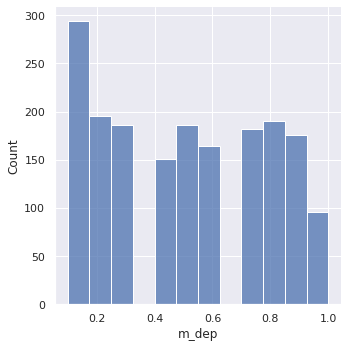

In [ ]:
# Next, we analyse the mobile depth ( in cm).
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df1["m_dep"])

plt.show()

A few mobiles are very thin and a few ones are almost a cm thick.

In a similar way, the data distribution can be analysed for all the data features. Implementing that will be very simple.

Let us see if there are any missing values or missing data.

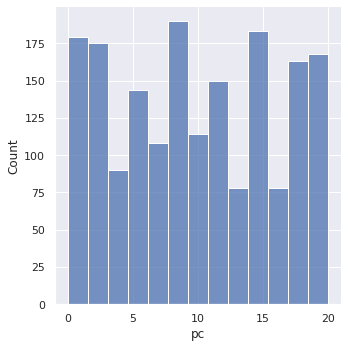

In [ ]:
# Analysis on primary camera basis (Megapixels)
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df1["pc"])

plt.show()

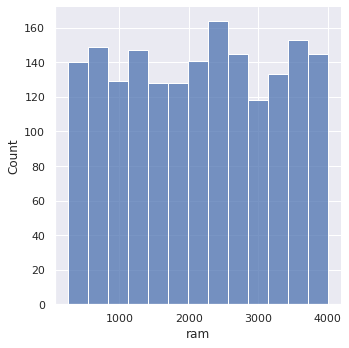

In [ ]:
# Analysis on the basis of ram
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df1["ram"])

plt.show()

In [ ]:
# Let us see if there are any missing values or missing data.
X=df1.drop(['price_range'], axis=1)
y=df1['price_range']

#missing values
X.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

In [ ]:
#train test split of data

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
#confusion matrix

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

**MODEL TRAINING**

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [ ]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)

Random Forest Classifier Accuracy Score:  0.9093406593406593
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.90      0.92      0.91        92
           2       0.82      0.86      0.84        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



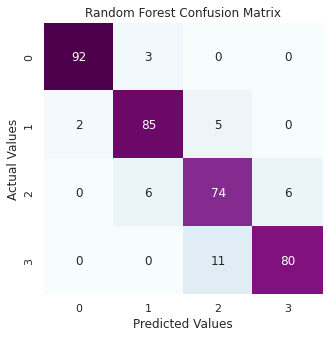

In [ ]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)

Gaussian NB Classifier Accuracy Score:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.79      0.73      0.76        92
           2       0.74      0.80      0.77        86
           3       0.92      0.93      0.93        91

    accuracy                           0.85       364
   macro avg       0.84      0.85      0.84       364
weighted avg       0.85      0.85      0.85       364



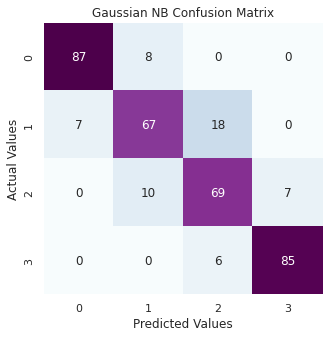

In [ ]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')

KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)

In [ ]:
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)

KNN Classifier Accuracy Score:  0.9340659340659341
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



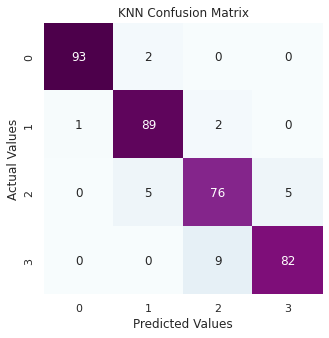

In [ ]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

SVM Classifier

In [ ]:
from sklearn import svm

In [ ]:
svm_clf = svm.SVC(decision_function_shape='ovo')

In [ ]:
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)

SVM Classifier Accuracy Score:  0.9587912087912088
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.94      0.93      0.94        86
           3       0.99      0.96      0.97        91

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



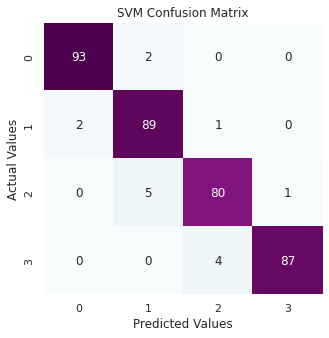

In [ ]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')


**Conclusion**

In this article, we looked at classification. Classifiers represent the intersection of advanced machine theory and practical application. These algorithms are more than just a sorting mechanism for organising unlabeled data instances into distinct groupings. Classifiers include a unique set of dynamic rules that include an interpretation mechanism for dealing with ambiguous or unknown values, all of which are suited to the kind of inputs being analysed. Most classifiers also utilise probability estimates, which enable end-users to adjust data categorization using utility functions.